In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_csv(path):
  return pd.read_csv(path)

In [3]:
df=load_csv('/content/sample_data/AB_NYC_2019 (1) - AB_NYC_2019 (1).csv')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

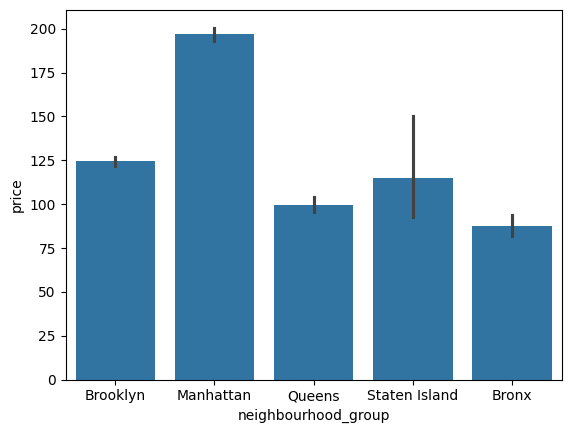

In [4]:
sns.barplot(x='neighbourhood_group',y='price',data=df)

<Axes: xlabel='neighbourhood_group', ylabel='Count'>

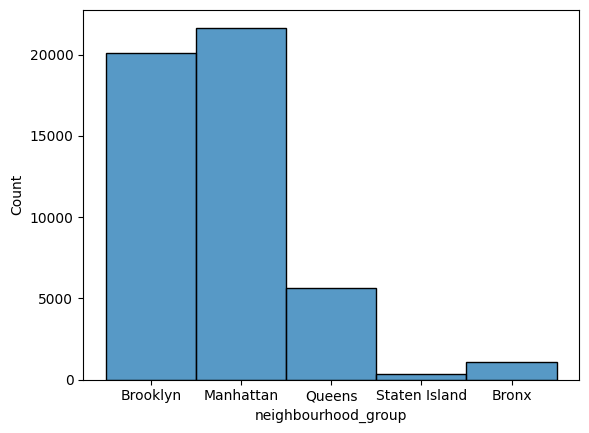

In [5]:
sns.histplot(x='neighbourhood_group',data=df)

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

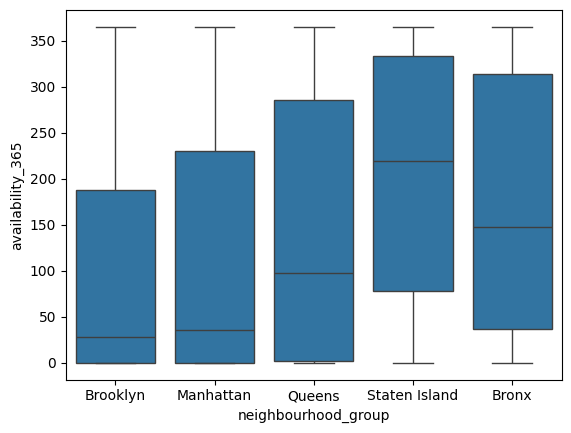

In [6]:
sns.boxplot(x='neighbourhood_group',y='availability_365',data=df)

In [7]:
df.dropna(inplace=True)

In [8]:
df['latitude'] = df['latitude'].str.replace('.', '').astype(float)

In [9]:
df['longitude'] = df['longitude'].str.replace('.', '').astype(float)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['latitude','longitude']])
df[['latitude','longitude']]=scaler.transform(df[['latitude','longitude']])

<Axes: xlabel='latitude', ylabel='longitude'>

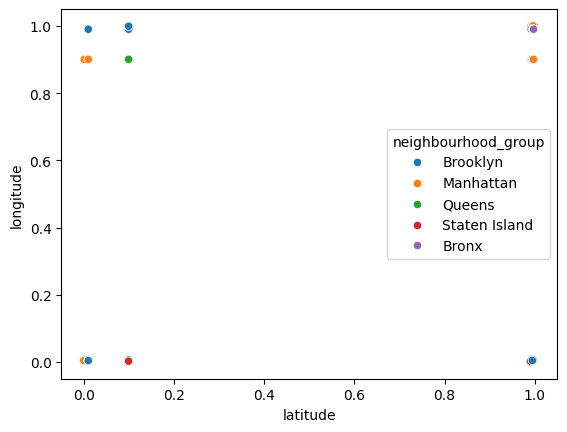

In [11]:
sns.scatterplot(x='latitude',y='longitude',hue='neighbourhood_group',data=df)

In [12]:
df.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type'],axis=1,inplace=True)

In [13]:
df['last_review'] = pd.to_datetime(df['last_review'])

<Axes: >

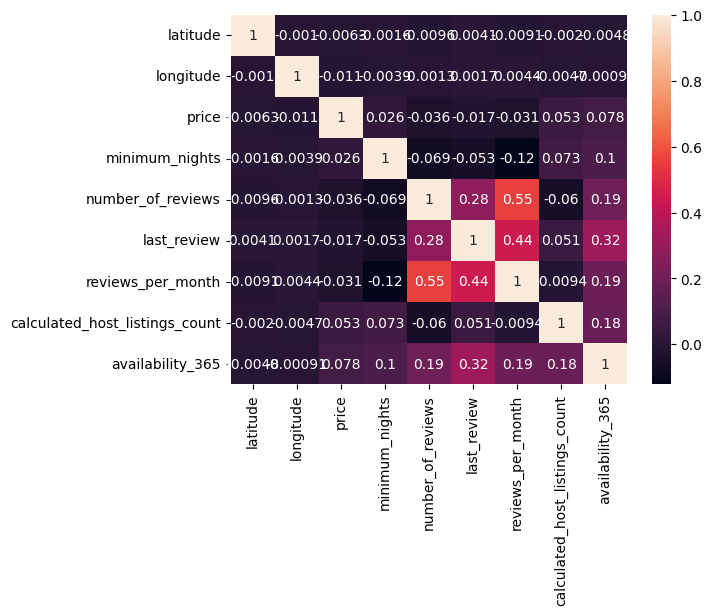

In [14]:
sns.heatmap(df.corr(),annot=True)

In [16]:
import plotly.express as px
fig=px.scatter(df,x='price',y='last_review')
fig.show()